Data: http://www.manythings.org/anki/. 
Inspiration from: https://towardsdatascience.com/language-translation-with-rnns-d84d43b40571. 


In [91]:
import csv
import string
import pandas as pd

In [92]:
# Load the data
filename = "/content/drive/MyDrive/spa.txt"

en = []
es = []
with open(filename, encoding='utf-8') as file:
    es_en_reader = csv.reader(file, delimiter='\t')
    for phrase in es_en_reader:
        en.append(phrase[0])
        es.append(phrase[1])
file.close()

How do the data look?

In [93]:
print(en[0:10]); print(es[0:10])
print(en[-2:]); print(es[-2:])
print(len(es))

['Go.', 'Go.', 'Go.', 'Go.', 'Hi.', 'Run!', 'Run!', 'Run!', 'Run!', 'Run.']
['Ve.', 'Vete.', 'Vaya.', 'Váyase.', 'Hola.', '¡Corre!', '¡Corran!', '¡Corra!', '¡Corred!', 'Corred.']
['It may be impossible to get a completely error-free corpus due to the nature of this kind of collaborative effort. However, if we encourage members to contribute sentences in their own languages rather than experiment in languages they are learning, we might be able to minimize errors.', "One day, I woke up to find that God had put hair on my face. I shaved it off. The next day, I found that God had put it back on my face, so I shaved it off again. On the third day, when I found that God had put hair back on my face again, I decided to let God have his way. That's why I have a beard."]
['Puede que sea imposible obtener un corpus completamente libre de errores debido a la naturaleza de este tipo de esfuerzo de colaboración. Sin embargo, si animamos a los miembros a contribuir frases en sus propios idiomas en 

The data set starts with short phrases (a single word) up to some very long sentences. 138,440 phrases and their translations in total. 


In [94]:
# Create a dataframe to store the lengths of phrases
en_len = []; es_len = []
for phrase in en:
    en_len.append(len(phrase.split()))
for phrase in es:
    es_len.append(len(phrase.split()))

lengths = pd.DataFrame({'en':en_len, 'es':es_len}) 

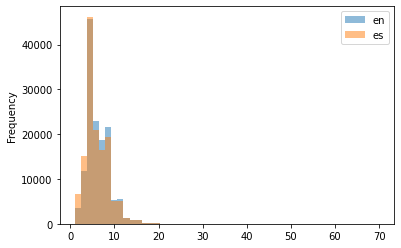

In [95]:
lengths.plot(kind='hist', bins = 50, alpha = 0.5) #, subplots = True)

In [96]:
print("Max phrase length (en): ", max(lengths["en"]))
print("Max phrase length (es): ", max(lengths["es"]))

Max phrase length (en):  70
Max phrase length (es):  68


Lengths of phrases are pretty similar between English and Spanish. Some phrases in English are longer than their Spanish translation - likely due to the fact that in Spanish, pronouns are often omitted.

How many unique words are present for each language? For the sake of this calculation, remove the punctuation and convert all words to lower case:

In [97]:
# Convert to lower case
for phrase in range(len(es)):
    es[phrase] = es[phrase].lower()
    en[phrase] = en[phrase].lower()

In [98]:
# Remove punctuation
punctuation = str(string.punctuation + '¡' + '¿')
transtab = str.maketrans('', '', punctuation)

en[:] = [phrase.translate(transtab) for phrase in en]
es[:] = [phrase.translate(transtab) for phrase in es]


In [99]:
# Unique words
en_vocab = [phrase.split() for phrase in en]
es_vocab = [phrase.split() for phrase in es]
en_vocab_list = [word for phrase in en_vocab for word in phrase]
es_vocab_list = [word for phrase in es_vocab for word in phrase]
#print(en_vocab_list[:100])
print('Vocab size (en): %d' % len(set(en_vocab_list)))
print('Vocab size (es): %d' % len(set(es_vocab_list)))

Vocab size (en): 14408
Vocab size (es): 27962


The Spanish text has far more unique words - in fact, there are 46 to 47 distinct verb forms in Spanish, compared with only four or five in English.